### Задание

При фиксированном seed=42 разобраться и поэкспериментировать с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Построить графики количества итераций оптимизации функции ackley от значения параметра.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [3]:
# Параметр strategy

strategy = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp',
           'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
nit_strategy = {}

for el in strategy:
    res = differential_evolution(ackley, bounds, seed=42, strategy = el)
    nit_strategy[el] = res.nit

In [4]:
# Сортировка по возрастанию полученных пар значений стратегия - кол-во итераций

nit_strategy = dict(sorted(nit_strategy.items(), key=lambda kv: kv[1]))

<function matplotlib.pyplot.show(close=None, block=None)>

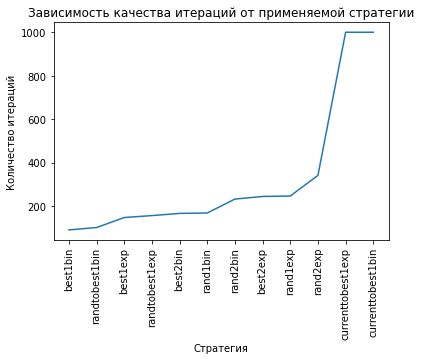

In [5]:
# Визуализация зависимости кол-ва итераций от стратегии

plt.plot(nit_strategy.keys(), nit_strategy.values())
plt.title('Зависимость качества итераций от применяемой стратегии')
plt.xticks(rotation=90)
plt.xlabel('Стратегия')
plt.ylabel('Количество итераций')
plt.show

In [6]:
# Параметр popsize (размер популяции)

nit_popsize = {}

for i in range(4, 100):
    res = differential_evolution(ackley, bounds, seed=42, popsize = i)
    nit_popsize[i] = res.nit

<function matplotlib.pyplot.show(close=None, block=None)>

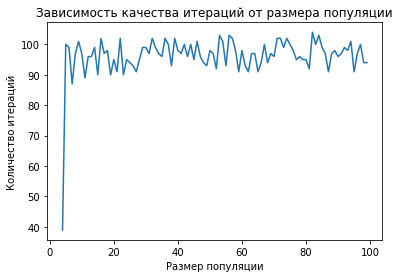

In [7]:
# Визуализация зависимости кол-ва итераций от размера популяции

plt.plot(nit_popsize.keys(), nit_popsize.values())
plt.title('Зависимость качества итераций от размера популяции')
plt.xlabel('Размер популяции')
plt.ylabel('Количество итераций')
plt.show

In [8]:
# Параметр tol (отностительный допуск)

nit_tol = {}
tol_range = np.arange(0.001, 0.4, 0.001)

for i in tol_range:
    res = differential_evolution(ackley, bounds, seed=42, tol = i)
    nit_tol[i] = res.nit

<function matplotlib.pyplot.show(close=None, block=None)>

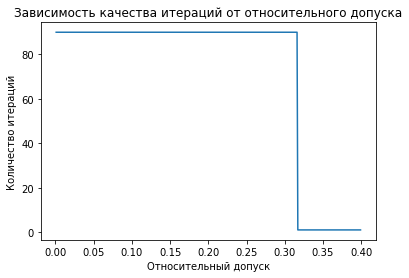

In [9]:
# Визуализация зависимости кол-ва итераций от относительного допуска

plt.plot(nit_tol.keys(), nit_tol.values())
plt.title('Зависимость качества итераций от относительного допуска')
plt.xlabel('Относительный допуск')
plt.ylabel('Количество итераций')
plt.show

In [10]:
# Параметр mutation (мутация)

nit_mutation = {}
mutation_range = np.arange(0, 2, 0.1)

for i in mutation_range:
    res = differential_evolution(ackley, bounds, seed=42, mutation = i)
    nit_mutation[i] = res.nit

<function matplotlib.pyplot.show(close=None, block=None)>

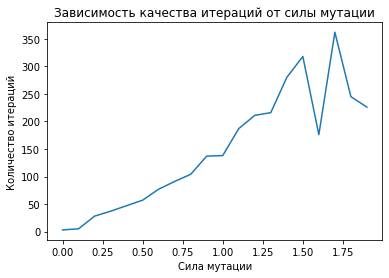

In [11]:
# Визуализация зависимости кол-ва итераций от силы мутации

plt.plot(nit_mutation.keys(), nit_mutation.values())
plt.title('Зависимость качества итераций от силы мутации')
plt.xlabel('Сила мутации')
plt.ylabel('Количество итераций')
plt.show

In [12]:
# Параметр recombination (рекомбинация)

nit_recombination = {}
recomb_range = np.arange(0, 1, 0.1)

for i in recomb_range:
    res = differential_evolution(ackley, bounds, seed=42, recombination = i)
    nit_recombination[i] = res.nit

<function matplotlib.pyplot.show(close=None, block=None)>

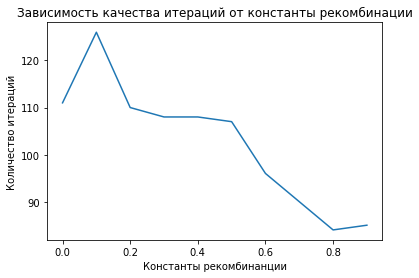

In [13]:
# Визуализация зависимости кол-ва итераций от константы рекомбинанции

plt.plot(nit_recombination.keys(), nit_recombination.values())
plt.title('Зависимость качества итераций от константы рекомбинации')
plt.xlabel('Константы рекомбинанции')
plt.ylabel('Количество итераций')
plt.show

In [14]:
# Параметр updating (обновление вектора наилучшего решения)

updating = ['immediate', 'deferred']
nit_updating = {}

for el in updating:
    res = differential_evolution(ackley, bounds, seed=42, updating = el)
    nit_updating[el] = res.nit

<function matplotlib.pyplot.show(close=None, block=None)>

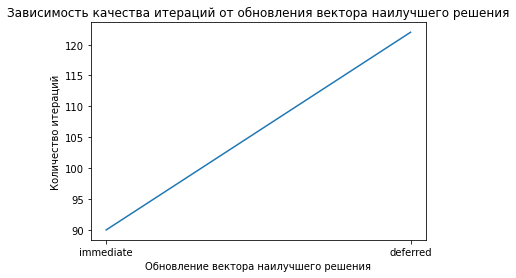

In [15]:
# Визуализация зависимости кол-ва итераций от обновления вектора наилучшего решения

plt.plot(nit_updating.keys(), nit_updating.values())
plt.title('Зависимость качества итераций от обновления вектора наилучшего решения')
plt.xlabel('Обновление вектора наилучшего решения')
plt.ylabel('Количество итераций')
plt.show

### Дополнительное задание

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

Наименьшее количество итераций получится при понижение размера популяции и силы мутации в сочетании с повышеннием значений относительного допуска и костанты рекомбинации. А также применения стратегии 'best2bin' и потоянного обновления вектора наилучшего решения в пределах одного поколения.

При этом наименьшее количество итераций не гарантирует нахождения глобального минимума. Пример ниже.

In [16]:
res = differential_evolution(ackley, bounds, seed=42, strategy = 'best1bin', popsize = 4, tol = 0.1, mutation = 0.1,
                             recombination = 0.9, updating = 'immediate')
res

     fun: 3.5744518772577476
     jac: array([ 2.48689956e-06, -1.06581410e-06])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 2
 success: True
       x: array([0.96847771, 0.96847764])